In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<font size=3>我選的函數是 y = (x-3)*(x-10)*(x-40)*(x-25)*(x-60) ，如下圖。這裡先記起來，有兩個 local min 分別為**15**和**55**左右的值。

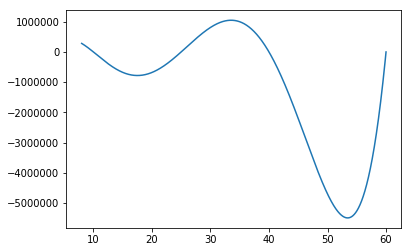

In [2]:
x = np.linspace(8,60,100000)

#假設這是我們的loss function
y = (x-3)*(x-10)*(x-40)*(x-25)*(x-60) #x^5 - 138x^4 + 6555x^3 - 127450x^2 + 927000x - 1800000

plt.plot(x,y)

<font size=3>x 的範圍選取很重要，因為如果我們將範圍設在0~1000 圖會是像下面這個樣子:

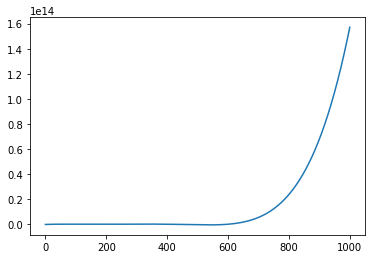

In [3]:
x = np.linspace(0,1000,100000)
y = (x-30)*(x-100)*(x-400)*(x-250)*(x-600)
plt.plot(x,y)

<font size=3>如上圖，可以發現完全看不到凹凸曲線，因為到後來的y實在是變太大了，雖然 gradient descent run下去還是會到我們的 local min ，但是圖上難以看出local min 到底在哪裡。 所以下面第一行(已經註解掉了)如果要用random函數產生 x ,我將他控制在8~60之間之間。

In [4]:
#startpoint=np.random.randint(8,60)
startpoint = 12 #初始位置先設定為x=12
startpoint

12

In [5]:
Gradient = 5*x**4-552*x**3+19665*x**2-254900*x+927000 #上面我的函數的微分結果 只是秀出來一下，沒有要真的用

#max_iter:要迭代幾次 。 start:初始的x point 。 learning_rate:就是learning rate
def GradientDescent(max_iter,start,learning_rate):
    result =start 
    plt.figure(figsize=(10,6))
    for i in range(0,max_iter):
        print(result)
        #============這裡是把result圖畫出來觀察是否收斂了(上一行是印出來看)
        plt.plot(i,result,'bo')
        plt.grid(True)
        plt.xlabel("Iteration number")
        plt.ylabel("output value")
        #=================#真的做gradient descent在這一行
        result = result - learning_rate * (5*result**4-552*result**3+19665*result**2-254900*result+927000)
    return result

<font size=3> **TEST1 : 可以發現結果是overflow的，表示我們的學習率太大，很快就跳到太大或太小的地方**

12
1514.16
-244103600990.07657
-1.7752795447848147e+44
-4.9663463138057166e+175


OverflowError: (34, 'Result too large')

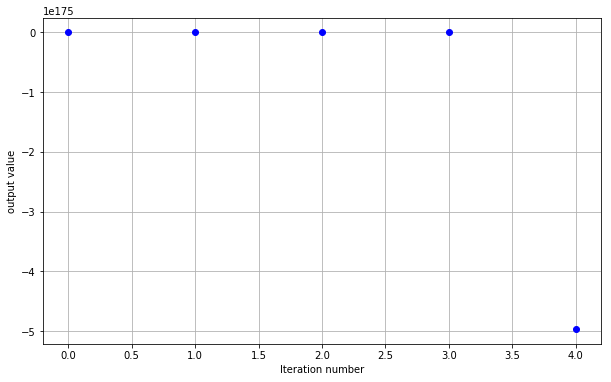

In [6]:
Final_answer = GradientDescent(50,startpoint,0.01)

<font size=3> **TEST2 : 可以發現結果的result在震盪(跳來跳去 back and forth)，表示我們的學習率還是太大。**

12
27.0216
9.768504878096188
25.318673579671724
7.837726188405629
18.809754057079324
14.576668595803998
23.989392802605593
7.554575306939519
17.360375600307123
17.904432762786854
16.633873890068678
19.601319985627168
12.891603201919391
26.435042647351715
8.898504748600832
23.066934974946797
7.943651923745934
19.316522206025077
13.48211910439941
25.749516243851996
8.155770671664897
20.274925952254605
11.580703425498955
27.079304098015463
9.865878642349408
25.508244175063325
7.963676829637929
19.41019704655873
13.285755284906767
26.000819421978743
8.39404060807217
21.26408375740413
9.922239586886002
25.612544021119533
8.042330745807643
19.77164743441714
12.548125181347487
26.73013308593955
9.308973577473854
24.258180899676894
7.529134147863861
17.22326825481344
18.22578733365534
15.892394579904696
21.286836737449452
9.888364785504326
25.550330073494564
7.994612488149393
19.55359108597296


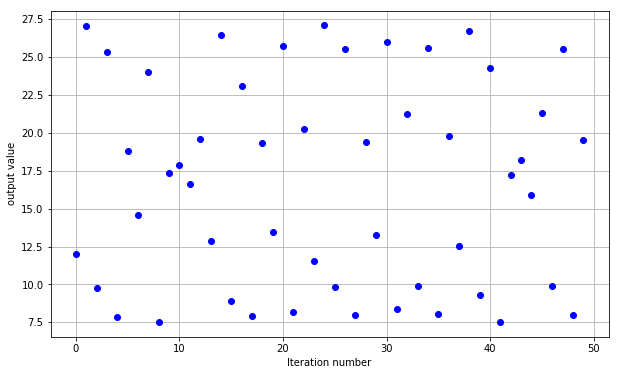

In [7]:
Final_answer = GradientDescent(50,startpoint,0.0001)

<font size=3> **上面注意我畫出來的圖橫軸是迭代的次數，而縱軸是這次迭代中求出的 result，因此一個好的狀況應該是很快的爬到local min，然後就不再移動** <br ><br >
<font size=3> **TEST3 : 這次我們的學習率又取得太小了 因此在我們的max iteration 50 次中無法收斂**

12
12.00450648
12.009011178877481
12.013514092332816
12.01801521607915
12.022514545842398
12.027012077361249
12.031507806387156
12.036001728684337
12.040493840029772
12.044984136213202
12.049472613037123
12.053959266316786
12.058444091880192
12.06292708556809
12.067408243233974
12.071887560744079
12.076365033977376
12.080840658825574
12.085314431193108
12.089786346997144
12.094256402167566
12.098724592646981
12.103190914390709
12.107655363366778
12.112117935555926
12.11657862695159
12.121037433559904
12.125494351399695
12.129949376502477
12.134402504912446
12.138853732686476
12.143303055894116
12.147750470617575
12.152195972951732
12.156639559004118
12.161081224894913
12.165520966756945
12.169958780735683
12.174394662989226
12.178828609688301
12.18326061701626
12.187690681169064
12.192118798355288
12.196544964796109
12.200969176725298
12.205391430389218
12.209811722046814
12.214230047969604
12.21864640444168


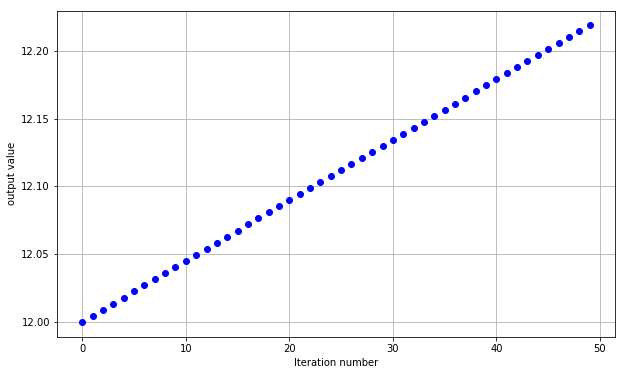

In [8]:
Final_answer = GradientDescent(50,startpoint,0.00000003)

<font size=3> **TEST4 : 這個學習率就很適合，我們很快就找到local min 大約在17.523的地方 再對應我們一開始畫的圖，發現真的local min就在大概17的地方!**

12
16.50648
17.52324921864835
17.523150051729374
17.523150268681317
17.52315026820662
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655
17.52315026820764
17.523150268207655


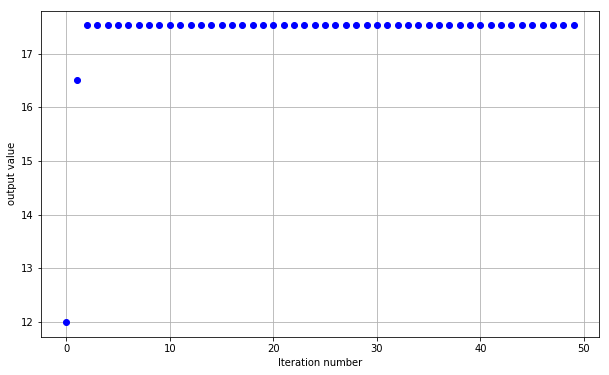

In [9]:
Final_answer = GradientDescent(50,startpoint,0.00003)

<font size=4> **討論初始x值的影響**

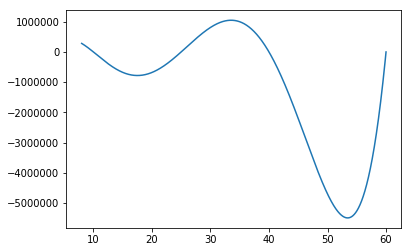

In [10]:
x = np.linspace(8,60,100000)

#假設這是我們的loss function
y = (x-3)*(x-10)*(x-40)*(x-25)*(x-60) #x^5 - 138x^4 + 6555x^3 - 127450x^2 + 927000x - 1800000

plt.plot(x,y)

<font size=3> **上圖是剛剛的圖:發現剛剛的實驗之所以會到17的local min 而不是 50~60 的那個local min 是因為初始值是12，所以12只會跌進比較小的那個山谷，不會跌到50~60的山谷 所以我們重設 startpoint 到 x = 40左右，預期應該這次就會成功找到50~60的local min**

38.5
39.51462175
40.74579158481275
42.227239967163385
43.976541995628565
45.967016452752134
48.08438571059803
50.09318700740367
51.68808466283575
52.6825911097119
53.1591310658566
53.344208876548485
53.408123843314975
53.42913749882166
53.435926539206925
53.43810722702908
53.43880636223503
53.43903037150797
53.43910213218394
53.4391251190641
53.43913248223517
53.4391348407954
53.43913559628442
53.43913583828093
53.43913591579668
53.439135940626414
53.43913594857969
53.43913595112737
53.4391359519434
53.43913595220475
53.43913595228847
53.43913595231529
53.439135952323895
53.439135952326666
53.43913595232756
53.43913595232782
53.439135952327945
53.43913595232791
53.43913595232792
53.43913595232795
53.43913595232792
53.43913595232795
53.43913595232792
53.43913595232795
53.43913595232792
53.43913595232795
53.43913595232792
53.43913595232795
53.43913595232792
53.43913595232795


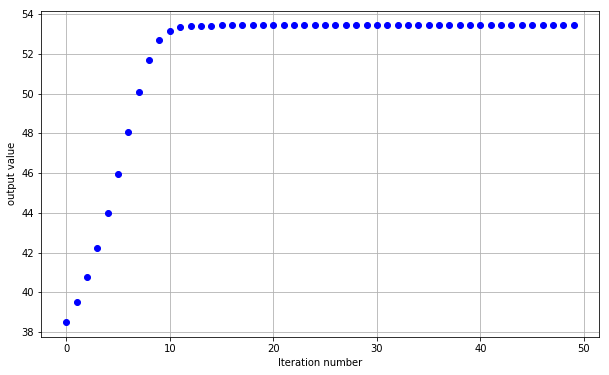

In [11]:
startpoint = 38.5
Final_answer = GradientDescent(50,startpoint,0.000004)

<font size=3> **如上圖，果然這次就找出我們想求的 local min，大概是53.439**